# Neural Networks

## XNOR

In [1]:
import numpy as np
from src.si.data import Dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[1], [0], [0], [1]])
dataset = Dataset(X,y,['X1','X2'],'X1 XNOR X2')

In [2]:
dataset.toDataframe()

X1  X2  X1 XNOR X2
0   0   0           1
1   0   1           0
2   1   0           0
3   1   1           1

In [3]:
from src.si.supervised.nn import NN, Dense, Activation
from src.si.util.activation import Sigmoid
from src.si.util.metrics import cross_entropy, cross_entropy_prime

In [4]:
# layer1 weights
w1 = np.array([[20,-20],[20,-20]])
b1 = np.array([[-30, 10]])
l1 = Dense(2, 2)
l1.setWeights(w1,b1)

In [5]:
# layer2 weights
w2 = np.array([[20],[20]])
b2 = np.array([[-10]])
l2 = Dense(2, 1)
l2.setWeights(w2,b2)

In [6]:
# Build the NN
nn = NN()
nn.add(l1)
nn.add(Activation(Sigmoid()))
nn.add(l2)
nn.add(Activation(Sigmoid()))
# pass the info that the model is fitted
nn.is_fited = True

In [7]:
np.round(nn.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [8]:
nn.cost(dataset.X,dataset.Y)

2.066588540474394e-09

## Train the model using backpropagation

In [9]:
nn2 = NN(epochs=100000,lr=0.1, verbose=False)
nn2.add(Dense(2, 2))
nn2.add(Activation(Sigmoid()))
nn2.add(Dense(2, 1))
nn2.add(Activation(Sigmoid()))
# use cross entropy instead of MSE as loss function
# nn2.use(cross_entropy,cross_entropy_prime)

In [10]:
nn2.fit(dataset)

 epoch 1/100000 error = 0.25864890414304764
 epoch 2/100000 error = 0.2583659294122771
 epoch 3/100000 error = 0.25809151626436216
 epoch 4/100000 error = 0.2578254394139614
 epoch 5/100000 error = 0.2575674773127723
 epoch 6/100000 error = 0.25731741223692334
 epoch 7/100000 error = 0.2570750303615309
 epoch 8/100000 error = 0.2568401218231308
 epoch 9/100000 error = 0.2566124807706865
 epoch 10/100000 error = 0.25639190540585544
 epoch 11/100000 error = 0.25617819801318215
 epoch 12/100000 error = 0.25597116498086436
 epoch 13/100000 error = 0.25577061681271934
 epoch 14/100000 error = 0.25557636813195805
 epoch 15/100000 error = 0.25538823767735064
 epoch 16/100000 error = 0.25520604829234506
 epoch 17/100000 error = 0.2550296269076791
 epoch 18/100000 error = 0.25485880451800175
 epoch 19/100000 error = 0.25469341615299623
 epoch 20/100000 error = 0.2545333008434766
 epoch 21/100000 error = 0.2543783015829033
 epoch 22/100000 error = 0.2542282652847446
 epoch 23/100000 error = 0.25

In [11]:
np.round(nn2.predict(X))

array([[1.],
       [0.],
       [0.],
       [1.]])

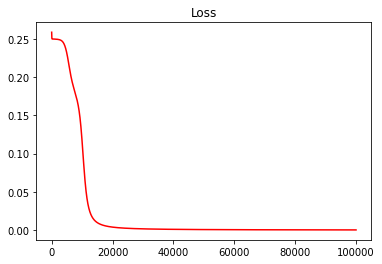

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(nn2.history.keys()), list(nn2.history.values()), '-', color='red')
plt.title('Loss')
plt.show()

In [13]:
np.round(nn2.predict(dataset.X))

array([[1.],
       [0.],
       [0.],
       [1.]])

In [14]:
nn2.cost(dataset.X,dataset.Y)

0.0003095026726820166